# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
pip install palmerpenguins

In [ ]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import *
import palmerpenguins as pp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

penguins = pp.load_penguins()
penguins.head()
# we would dummify species, island, and sex

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
dummies = pd.get_dummies(penguins)
dummies = dummies.dropna()

X = dummies.drop(columns=['bill_depth_mm']) #uses all columns from dummies except bill depth, drops that
Y = dummies['bill_depth_mm'] #predicts bill depth

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [ ]:
dummies = pd.get_dummies(penguins)
dummies = dummies.dropna()

X = dummies.drop(columns=['bill_depth_mm']) #uses all columns from dummies except bill depth, drops that
Y = dummies['bill_depth_mm'] #predicts bill depth

enc = OneHotEncoder()
xdummies = enc.fit_transform(X)

model = LinearRegression()
model.fit(xdummies, Y)




LinearRegression()

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

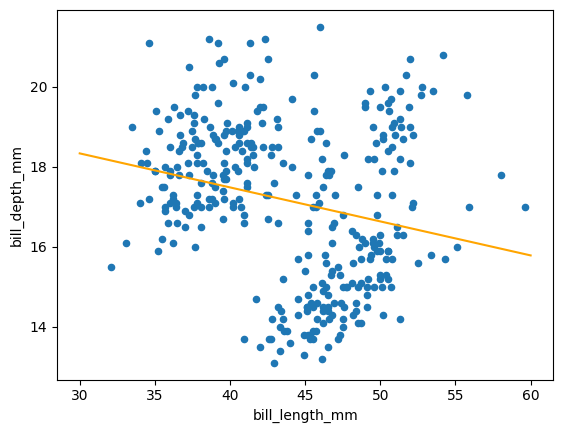

In [ ]:
# linear Code Here
mill_model = LinearRegression()
mill_model.fit(
    X=dummies[["bill_length_mm"]],
    y=dummies["bill_depth_mm"])

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
y_new_ = pd.Series(
    mill_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

dummies.plot.scatter(x=["bill_length_mm"], y="bill_depth_mm")
y_new_.plot.line(c = "orange");

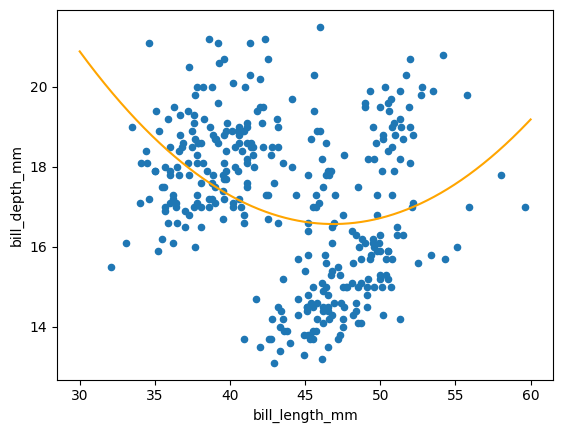

In [ ]:
#quadratic model
dummies["bill_length_mm_q"] = dummies["bill_length_mm"]**2

X = dummies[["bill_length_mm", "bill_length_mm_q"]]
Y = dummies["bill_depth_mm"]


mill_model_quadratic = LinearRegression()
mill_model_quadratic.fit(X, Y)

X_new_quad = pd.DataFrame()
X_new_quad["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new_quad["bill_length_mm_q"] = X_new_quad["bill_length_mm"]**2

# Predict using the quadratic model
y_new_quad_pred = pd.Series(
    mill_model_quadratic.predict(X_new_quad),
    index=X_new_quad["bill_length_mm"]
)

# Plot the original data and the quadratic fit
dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_quad_pred.plot.line(c = "orange");

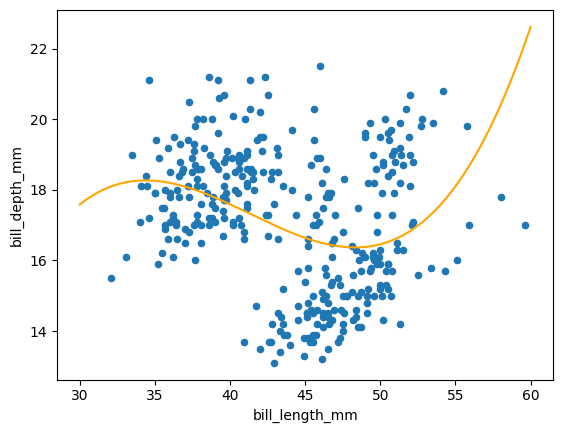

In [ ]:
#cubic model
dummies["bill_length_mm_c"] = dummies["bill_length_mm"]**3

X = dummies[["bill_length_mm", "bill_length_mm_q", "bill_length_mm_c"]]
Y = dummies["bill_depth_mm"]


mill_model_cubic = LinearRegression()
mill_model_cubic.fit(X, Y)

X_new_cubic = pd.DataFrame()
X_new_cubic["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new_cubic["bill_length_mm_q"] = X_new_cubic["bill_length_mm"]**2 # Add the squared term
X_new_cubic["bill_length_mm_c"] = X_new_cubic["bill_length_mm"]**3

# Predict using the cubic model
y_new_cubic_pred = pd.Series(
    mill_model_cubic.predict(X_new_cubic),
    index=X_new_cubic["bill_length_mm"]
)

# Plot the original data and the cubic fit
dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_cubic_pred.plot.line(c = "orange");

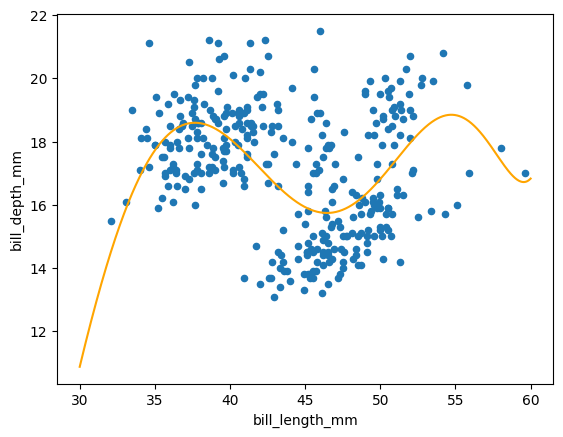

In [ ]:
#degree 10 model
dummies["bill_length_mm_four"] = dummies["bill_length_mm"]**4
dummies["bill_length_mm_five"] = dummies["bill_length_mm"]**5
dummies["bill_length_mm_six"] = dummies["bill_length_mm"]**6
dummies["bill_length_mm_seven"] = dummies["bill_length_mm"]**7
dummies["bill_length_mm_eight"] = dummies["bill_length_mm"]**8
dummies["bill_length_mm_nine"] = dummies["bill_length_mm"]**9
dummies["bill_length_mm_ten"] = dummies["bill_length_mm"]**10

X = dummies[["bill_length_mm", "bill_length_mm_q", "bill_length_mm_c", "bill_length_mm_four", "bill_length_mm_five", "bill_length_mm_six", "bill_length_mm_seven","bill_length_mm_eight", "bill_length_mm_nine", "bill_length_mm_ten"]]
Y = dummies["bill_depth_mm"]


mill_model_cubic = LinearRegression()
mill_model_cubic.fit(X, Y)

X_new_cubic = pd.DataFrame()
X_new_cubic["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new_cubic["bill_length_mm_q"] = X_new_cubic["bill_length_mm"]**2 # Add the squared term
X_new_cubic["bill_length_mm_c"] = X_new_cubic["bill_length_mm"]**3
X_new_cubic["bill_length_mm_four"] = X_new_cubic["bill_length_mm"]**4
X_new_cubic["bill_length_mm_five"] = X_new_cubic["bill_length_mm"]**5
X_new_cubic["bill_length_mm_six"] = X_new_cubic["bill_length_mm"]**6
X_new_cubic["bill_length_mm_seven"] = X_new_cubic["bill_length_mm"]**7
X_new_cubic["bill_length_mm_eight"] = X_new_cubic["bill_length_mm"]**8
X_new_cubic["bill_length_mm_nine"] = X_new_cubic["bill_length_mm"]**9
X_new_cubic["bill_length_mm_ten"] = X_new_cubic["bill_length_mm"]**10

# Predict using the degree 10 polynomial model
y_new_cubic_pred = pd.Series(
    mill_model_cubic.predict(X_new_cubic),
    index=X_new_cubic["bill_length_mm"]
)

# Plot the original data and the degre 10 polynomial fit
dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_cubic_pred.plot.line(c = "orange");

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Underfit: the linear and quadratic models seem to underfit the data, the lines to not seem to go through or be near the majority of the points, theres no real trends to them

Overfit: The polynomial model may be overfit, it aligns with the data very well. If this same model was used with other data it might not perform as well.

Best Fit: The cubic model seems to be the best fit. It tries to align with some of the points, but not all of them. By not aligning with everything, it may fit with other datasets that are different.